In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
L = 100.#Tamaño de la caja
ran_x = L*np.random.uniform(0.,1.,5000)#5000 números aleatorios en x
ran_y = L*np.random.uniform(0.,1.,5000)#5000 números aleatorios en y

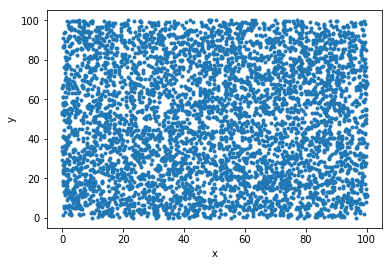

In [3]:
#Grafica de los puntos aleatorios
plt.plot(ran_x,ran_y,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

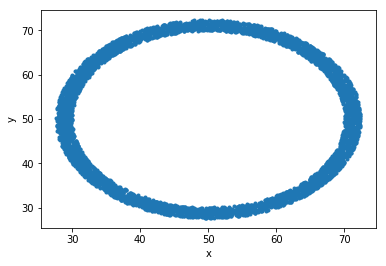

In [4]:
#Generación de los datos y su gráfica
theta = np.random.random(5000)*2.*np.pi
r1 = np.random.uniform(400.,500.,5000)#Radio entre 20 y 22.3
r = np.sqrt(r1)
x = r*np.cos(theta) +50.
y = r*np.sin(theta) + 50.
plt.plot(x,y,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

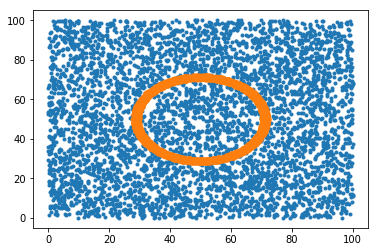

In [5]:
#Gráfica de datos y aleatorios
plt.plot(ran_x,ran_y,'.')
plt.plot(x,y,'.')
plt.show()

In [6]:
#Función para calcular las distancias
def distancia(x1,x2,y1,y2):
    d = np.sqrt((x2 - x1)**2 + (y2-y1)**2)
    return d

In [7]:
Lmax = np.sqrt(2.)*L#distancia máxima en la caja 2D (la diagonal)
tbin = Lmax/20#tamaño de los bins, número de bins = 20
nbin = np.linspace(0.,np.sqrt(2.)*L,20)#Genera los bins
print nbin

[  0.           7.44322928  14.88645855  22.32968783  29.7729171
  37.21614638  44.65937565  52.10260493  59.54583421  66.98906348
  74.43229276  81.87552203  89.31875131  96.76198058 104.20520986
 111.64843913 119.09166841 126.53489769 133.97812696 141.42135624]


In [8]:
cont = np.zeros(20,dtype=int)#arreglo de ceros del número de bins donde contaremos las distancias entre los datos,formado por enteros
cont_ran = np.zeros(20,dtype=int)#arreglo de ceros del número de bins donde contaremos las distancias entre los aleatorios
w1 = 1#Peso 1, en este caso asignado a x<50
w2 = 2#Peso 2, en este caso asignado a x>50

In [9]:
#Ciclos para contar las distancias
for i in range(len(x)):
    for j in range(i+1,len(x)):
        d_d = distancia(x[i],x[j],y[i],y[j])
        d_r = distancia(ran_x[i],ran_x[j],ran_y[i],ran_y[j])
        temp = int(d_d/tbin)#Toma el valor entero de la división
        temp_ran = int(d_r/tbin)
        cont_ran[temp_ran] +=1#añade 1 al bin correspondiente de la distancia
        if (x[i]>50.):
            cont[temp] += w2*1#añade 1 al bin correspondiente a esa distancia con un peso w2
        else:
            cont[temp] += w1*1#añade 1 al bin correspondiente a esa distancia con un peso w1
        if(x[j]>50.):
            cont[temp] += w2*1
        else:
            cont[temp] += w1*1

Histograma de datos

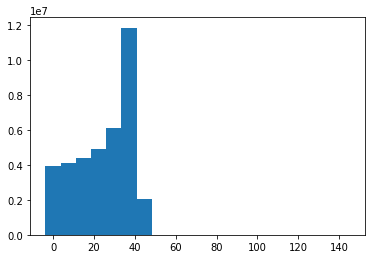

In [10]:
plt.bar(nbin,cont, width=7.5)
plt.show()

Histograma de aleatorios

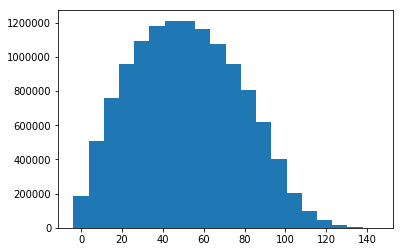

In [11]:
plt.bar(nbin,cont_ran, width=7.5)
plt.show()

Función de Correlación de Peebles $\frac{DD(r)}{RR(r)} - 1$ 

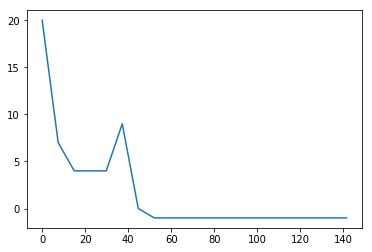

In [12]:
plt.plot(nbin,(cont/cont_ran) -1)
#plt.ylim(-1.,10.)
plt.show()

Para la función de correlación de Landy-Szalay $1 + \frac{DD(r)}{RR(r)} -2\frac{DR(r)}{RR(r)} $

In [13]:
cont_dr = np.zeros(20,dtype=int)#arreglo de ceros del número de bins donde contaremos las distancias entre los datos y los aleatorios

In [14]:
#Calcula las distancias entre cada uno de los datos y los aleatorios
for i in range(len(x)):
    for j in range(len(x)):
        d_dr = distancia(x[i],ran_x[j],y[i],ran_y[j])
        temp_dr = int(d_dr/tbin)
        if (x[i]>50.):
            cont_dr[temp_dr] += w2*1
        else:
            cont_dr[temp_dr] += w1*1
        if(x[j]>50.):
            cont_dr[temp_dr] += w2*1
        else:
            cont_dr[temp_dr] += w1*1

Histograma de las distancias entre los datos y los aleatorios

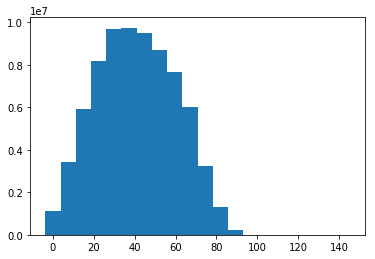

In [15]:
plt.bar(nbin,cont_dr, width=7.5)
plt.show()

Función de Correlación de Landy-Szalay

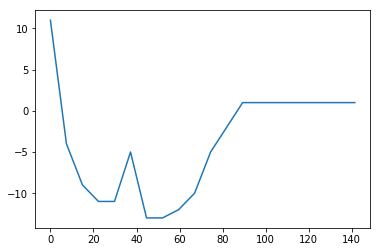

In [16]:
plt.plot(nbin,1.+ cont/cont_ran -2*cont_dr/cont_ran)
plt.show()